<a href="https://colab.research.google.com/github/hugofung919/Comp3516_group/blob/main/Pressure_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tf.random.set_seed(42)

In [ ]:
data = pd.read_csv('train_set.csv')
data.dropna(inplace=True) # drop all data with na
data.head(10) # display first 10 data

,time,seconds_elapsed,relativeAltitude,pressure,Floor
0,1.681640e+18,-0.363810,0.000000,1008.104477,G
1,1.681640e+18,0.666242,-0.018494,1008.106461,G
2,1.681640e+18,1.696307,-0.034348,1008.108444,G
3,1.681640e+18,2.726326,-0.036991,1008.108826,G
4,1.681640e+18,3.756358,-0.036991,1008.108826,G
5,1.681640e+18,3.952356,-0.036991,1008.108826,G
6,1.681640e+18,5.015659,-0.031708,1008.108063,G
7,1.681640e+18,6.078951,-0.036991,1008.108902,G
8,1.681640e+18,7.142245,-0.039635,1008.109207,G
9,1.681640e+18,8.205521,-0.068699,1008.112564,G


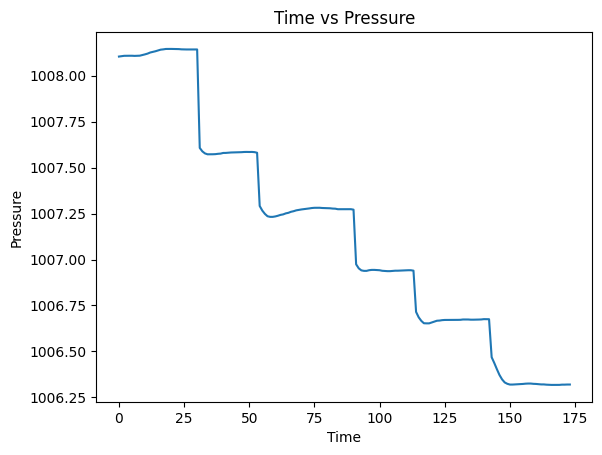

In [ ]:
# Time vs Pressure
plt.title("Time vs Pressure")
plt.xlabel("Time")
plt.ylabel("Pressure")
plt.plot(range(0, data.shape[0]), data['pressure'])

                  seconds_elapsed  relativeAltitude  pressure
seconds_elapsed          1.000000          0.989053 -0.989041
relativeAltitude         0.989053          1.000000 -1.000000
pressure                -0.989041         -1.000000  1.000000


<ipython-input-51-c6d3f9bfc287>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data[['seconds_elapsed','relativeAltitude','pressure','Floor']].corr()


<Axes: >

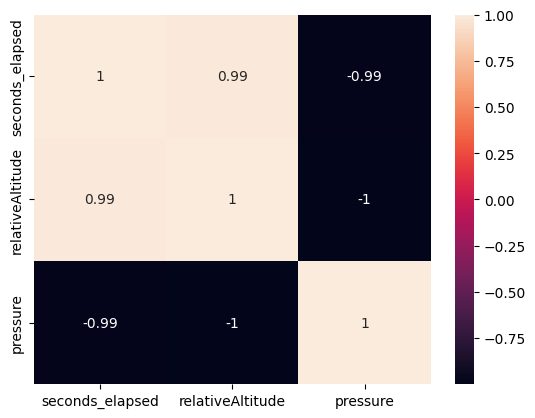

In [ ]:
# Use Pearson Correlation Coefficient
corr = data[['seconds_elapsed','relativeAltitude','pressure','Floor']].corr()
print(corr)
# Visualize Pearson Correlation Coefficient
sns.heatmap(corr, annot=True)

In [ ]:
# Preprocessing and feature extraction
def transformFloor(floor):
    if floor == 'G': # transform G to 0
        return int(0)
    else:
        return int(floor) # transform data from str to int
def nomoralizePressure(pressure, maxP, minP): # nomoralize pressure
    return round((pressure - minP) / (maxP - minP), 6)

    
data['Floor'] = data['Floor'].apply(transformFloor)
data['pressure'] = nomoralizePressure(data['pressure'],data['pressure'].max(), data['pressure'].min())

In [ ]:
data.head(10)

,time,seconds_elapsed,relativeAltitude,pressure,Floor
0,1.681640e+18,-0.363810,0.000000,0.977300,0
1,1.681640e+18,0.666242,-0.018494,0.978385,0
2,1.681640e+18,1.696307,-0.034348,0.979470,0
3,1.681640e+18,2.726326,-0.036991,0.979679,0
4,1.681640e+18,3.756358,-0.036991,0.979679,0
5,1.681640e+18,3.952356,-0.036991,0.979679,0
6,1.681640e+18,5.015659,-0.031708,0.979261,0
7,1.681640e+18,6.078951,-0.036991,0.979720,0
8,1.681640e+18,7.142245,-0.039635,0.979887,0
9,1.681640e+18,8.205521,-0.068699,0.981723,0


In [ ]:
x_train = data[['seconds_elapsed', 'relativeAltitude', 'pressure']].to_numpy().reshape((-1,3,1))
y_train = data[['Floor']].to_numpy()
print(x_train.shape)
print(y_train.shape)

(174, 3, 1)
(174, 1)


In [ ]:
class SimpleNet(tf.keras.Model):
    def __init__(self, filter_size, kernale_size):
        super(SimpleNet, self).__init__()
        self.conv = tf.keras.layers.Conv1D(filters=filter_size, kernel_size=kernale_size, activation='relu', input_shape=(3, 1))
        self.pool = tf.keras.layers.MaxPooling1D(pool_size=kernale_size)
        self.bn = tf.keras.layers.BatchNormalization()
        self.activation = tf.keras.layers.Activation('relu')
        self.fl = tf.keras.layers.Flatten()
        self.classify = tf.keras.layers.Dense(6,activation='softmax')

        
    def call(self, x):
        x = self.conv(x)
        x = self.pool(x)
        x = self.bn(x)
        x = self.activation(x)
        x = self.fl(x)
        x = self.classify(x)
        return x

In [ ]:
# train dataset with cnn
net = SimpleNet(16, 1)
net.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
net.fit(x_train, y_train, batch_size=32,epochs=150)

Epoch 1/150
6/6 [==============================] - 3s 6ms/step - loss: 1.5842 - accuracy: 0.2299
Epoch 2/150
6/6 [==============================] - 0s 5ms/step - loss: 1.5256 - accuracy: 0.3506
Epoch 3/150
6/6 [==============================] - 0s 6ms/step - loss: 1.4724 - accuracy: 0.3506
Epoch 4/150
6/6 [==============================] - 0s 4ms/step - loss: 1.4339 - accuracy: 0.3506
Epoch 5/150
6/6 [==============================] - 0s 5ms/step - loss: 1.4066 - accuracy: 0.3506
Epoch 6/150
6/6 [==============================] - 0s 4ms/step - loss: 1.3705 - accuracy: 0.3563
Epoch 7/150
6/6 [==============================] - 0s 4ms/step - loss: 1.3505 - accuracy: 0.3563
Epoch 8/150
6/6 [==============================] - 0s 5ms/step - loss: 1.3246 - accuracy: 0.3563
Epoch 9/150
6/6 [==============================] - 0s 7ms/step - loss: 1.3049 - accuracy: 0.3563
Epoch 10/150
6/6 [==============================] - 0s 6ms/step - loss: 1.2853 - accuracy: 0.3563
Epoch 11/150
6/6 [===========

In [ ]:
test_set = pd.read_csv('test_set.csv')
test_set.dropna(inplace=True)
test_set.head(10)

,time,seconds_elapsed,relativeAltitude,pressure,Floor
0,1.680000e+18,-0.340384,0.000000,1010.00565,1
1,1.680000e+18,0.688950,0.052847,1009.99924,1
2,1.680000e+18,1.718292,0.105694,1009.99291,1
3,1.680000e+18,2.747628,0.132116,1009.98985,1
4,1.680000e+18,3.776928,0.132116,1009.98985,1
5,1.680000e+18,3.973879,0.142685,1009.98856,1
6,1.680000e+18,5.036376,0.118904,1009.99146,1
7,1.680000e+18,6.098880,0.071342,1009.99703,1
8,1.680000e+18,7.161360,-0.010569,1010.00702,1
9,1.680000e+18,8.223900,-0.081911,1010.01556,1


In [ ]:
test_set['Floor'] = test_set['Floor'].apply(transformFloor)
test_set['pressure'] = nomoralizePressure(test_set['pressure'],test_set['pressure'].max(), test_set['pressure'].min())

In [ ]:
test_set.head(10)

,time,seconds_elapsed,relativeAltitude,pressure,Floor
0,1.680000e+18,-0.340384,0.000000,0.992628,1
1,1.680000e+18,0.688950,0.052847,0.990903,1
2,1.680000e+18,1.718292,0.105694,0.989199,1
3,1.680000e+18,2.747628,0.132116,0.988376,1
4,1.680000e+18,3.776928,0.132116,0.988376,1
5,1.680000e+18,3.973879,0.142685,0.988028,1
6,1.680000e+18,5.036376,0.118904,0.988809,1
7,1.680000e+18,6.098880,0.071342,0.990308,1
8,1.680000e+18,7.161360,-0.010569,0.992997,1
9,1.680000e+18,8.223900,-0.081911,0.995295,1


In [ ]:
x_test = test_set[['seconds_elapsed', 'relativeAltitude', 'pressure']].to_numpy().reshape((-1,3,1))
y_test = test_set[['Floor']].to_numpy()
print(x_test.shape)
print(y_test.shape)

(348, 3, 1)
(348, 1)


In [ ]:
net.evaluate(x_test, y_test, batch_size = 64)

6/6 [==============================] - 0s 2ms/step - loss: 1.5310 - accuracy: 0.6379


[1.531014084815979, 0.6379310488700867]